# Introduction

The Covid-19 pandemic has been hitting hard on much American business. In response to it, the US government has initiated the Paycheck Protection Program (PPP) in order to help businesses continue paying their workers. 

In this project, I will use public data to get insights into this program. The data for all states is available here

https://sba.app.box.com/s/tvb0v5i57oa8gc6b5dcm9cyw7y2ms6pp

As an Illinois resident, I will restrict myself to Illinois only. 

I first learned about the PPP program from a <a href="https://www.meetup.com/PyDataChi/events/271789356"> talk</a> by Rory Hartong-Redden. He  had a <a href="https://github.com/roryhr/data_science_generalist"> Github repo </a> for his talk where he also did some analysis. My approach is a little different from Rory's: I will focus more on visualization. 

I am thankful to the Data Science Generalist team for organizing this event and to Rory for his wonderful talk.  

# Load the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
df=pd.read_csv('PPP Data up to 150k - IL.csv')
df.head()

,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,149999.0,EAST DUNDEE,IL,60118.0,238350.0,Corporation,White,Unanswered,Unanswered,NaN,0.0,04/14/2020,The Huntington National Bank,IL - 06
1,149995.0,CHICAGO,IL,60611.0,722511.0,Limited Liability Partnership,Unanswered,Male Owned,Non-Veteran,NaN,15.0,04/27/2020,Republic Bank of Chicago,IL - 07
2,149962.0,CHICAGO,IL,60622.0,541618.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,12.0,04/16/2020,"JPMorgan Chase Bank, National Association",IL - 04
3,149955.0,LOMBARD,IL,60148.0,621111.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,8.0,05/07/2020,Cross River Bank,IL - 06
4,149922.5,CHICAGO,IL,60608.0,511210.0,Limited Liability Company(LLC),White,Male Owned,Non-Veteran,NaN,8.0,04/12/2020,First Midwest Bank,IL - 03


Let's have an overview about this dataset. First, let us take a look at the data type of each columns. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174745 entries, 0 to 174744
Data columns (total 14 columns):
LoanAmount       174745 non-null float64
City             174738 non-null object
State            174745 non-null object
Zip              174738 non-null float64
NAICSCode        167686 non-null float64
BusinessType     174500 non-null object
RaceEthnicity    174745 non-null object
Gender           174745 non-null object
Veteran          174745 non-null object
NonProfit        5433 non-null object
JobsRetained     165186 non-null float64
DateApproved     174745 non-null object
Lender           174745 non-null object
CD               174745 non-null object
dtypes: float64(4), object(10)
memory usage: 18.7+ MB


We can convert the DateApproved column into a datetime object.

In [4]:
df['DateApproved']=pd.to_datetime(df['DateApproved'])

Next, let us have a descriptive overview of the dataset.

In [5]:
df.describe()

,LoanAmount,Zip,NAICSCode,JobsRetained
count,174745.000000,174738.00000,167686.000000,165186.000000
mean,31679.864620,60850.03036,537892.053332,4.854001
std,32616.795136,841.79601,197290.458456,10.158962
min,1.000000,29488.00000,111110.000000,0.000000
25%,9000.000000,60176.00000,447110.000000,1.000000
50%,20080.000000,60605.00000,541211.000000,2.000000
75%,42220.000000,61265.00000,624410.000000,6.000000
max,149999.000000,83108.00000,999990.000000,500.000000


We see that 174,745 businesses participated in the PPP program so far. On average, the PPP program saved about 5 jobs per business. Note that the number of Zipcodes is less than the number of rows. I suspect that this is due to the fact that there are some missing values on zip codes. We can check that by the following code.

In [6]:
#the number of missing zip codes
df['Zip'].isna().sum()

7

# Question: How much money did Illinoisian business receive from the PPP?

We can answer this question by the following simple code.

In [7]:
df['LoanAmount'].sum()/10**9

5.53589794306

So, Illinois receives more than 5.5 billion dollars from PPP. 

We can dive in futher to see the distribution of the loan.

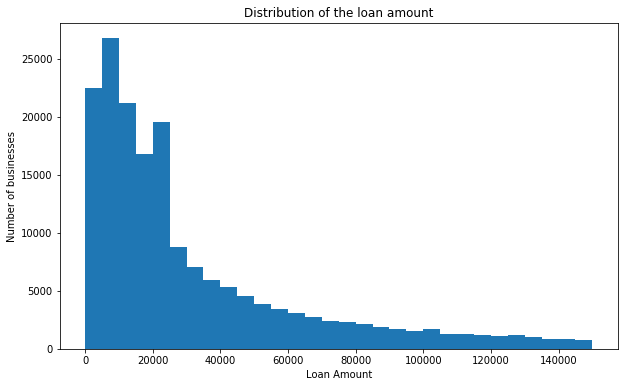

In [8]:
plt.figure(figsize=(10,6))
df['LoanAmount'].plot(kind='hist', bins=30)
plt.xlabel('Loan Amount')
plt.ylabel('Number of businesses')
plt.title('Distribution of the loan amount')
plt.show()

We see that this distribution has long tail. About half of the businesses loan less than 20,000$. 

We can also plot the log of the loan amount to see whether it follows a normal distribution.

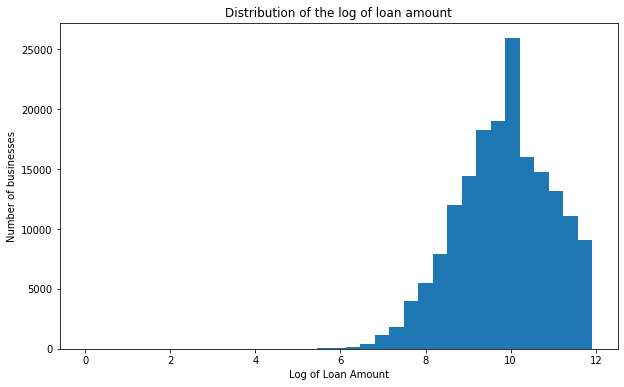

In [9]:
plt.figure(figsize=(10,6))
(df['LoanAmount'].apply(lambda x: math.log(x))).plot(kind='hist', bins=35)
plt.xlabel('Log of Loan Amount')
plt.ylabel('Number of businesses')
plt.title('Distribution of the log of loan amount')
plt.show()

The log loan amount is clearly more symmetric.

It seems that several businesses only applied for a loan of less than 1000$. Let us take a look at them.

In [10]:
df[df['LoanAmount']<1000]['BusinessType'].value_counts()

Sole Proprietorship                394
Self-Employed Individuals          107
Independent Contractors            100
Corporation                         98
Limited  Liability Company(LLC)     93
Subchapter S Corporation            32
Non-Profit Organization              5
Partnership                          4
Professional Association             1
Name: BusinessType, dtype: int64

At the moment, it is not clear to me why about 100 corporations applied to PPP such a small loan amount. 

# Question: Which regions receive the most amount of loan from the PPP program?

First, we find the top 10 cities that receive the most amount of loan from PPP.

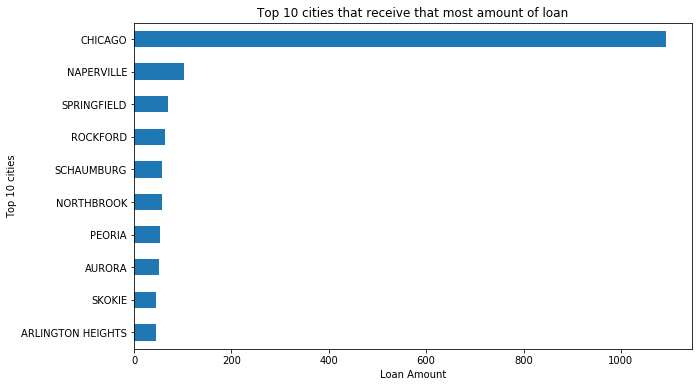

In [11]:
plt.figure(figsize=(10,6))
((df.groupby('City')['LoanAmount'].sum()/10**6).sort_values(ascending=False)).head(10).sort_values().plot(kind='barh')
plt.xlabel('Loan Amount')
plt.ylabel('Top 10 cities')
plt.title('Top 10 cities that receive that most amount of loan')
plt.show()

It is not surprise that Chicagoan receives the most from PPP. This might be due to the fact that Chicago, Naperville, Springfield are big cities and hence more bussinesses. Instead of looking at the raw sum, we can also look at the mean loan amount as well. 

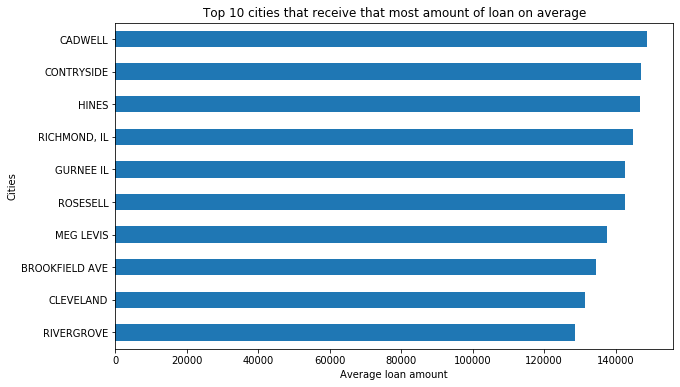

In [12]:
plt.figure(figsize=(10,6))
((df.groupby('City')['LoanAmount'].mean()).sort_values(ascending=False)).head(10).sort_values().plot(kind='barh')
plt.xlabel('Average loan amount')
plt.ylabel('Cities')
plt.title('Top 10 cities that receive that most amount of loan on average')
plt.show()

Now Chicago, Naperville, and Springfield are not on the list any more! We can partially conclude that PPP is a fair program-it helps everyone in need.  

Instead of focusing on cities, we can also study the same questions for different zip codes.

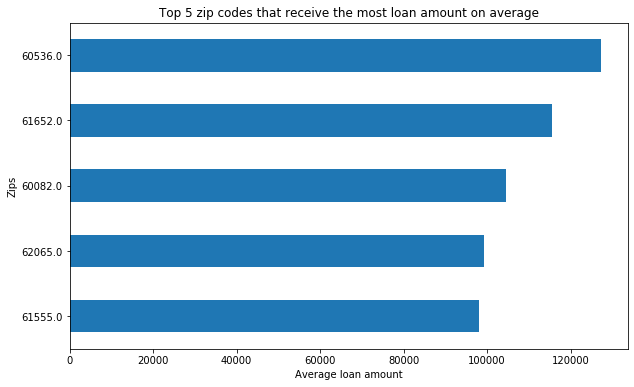

In [13]:
plt.figure(figsize=(10,6))
((df.groupby('Zip')['LoanAmount'].mean()).sort_values(ascending=False)).head(5).sort_values().plot(kind='barh')
plt.xlabel('Average loan amount')
plt.ylabel('Zips')
plt.title('Top 5 zip codes that receive the most loan amount on average')
plt.show()

# Question: What are the most popular business types that got help from PPP?

As before, we can look at this problem from two different perspectives: either by looking at the number of applications or by looking at the mean value of the loan amount for each business type. First, we sort the business types by the number of applications to PPP. From this perspective, cooperation, Sole Proprietorship, LLL have the most number of applications.

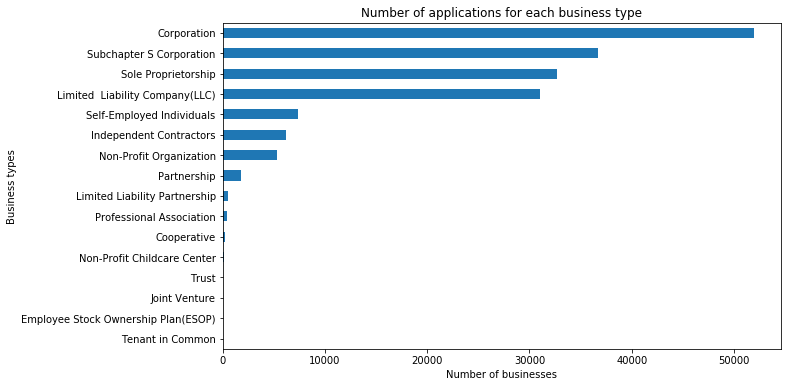

In [14]:
plt.figure(figsize=(10,6))
(df['BusinessType'].value_counts()).sort_values().plot(kind='barh')
plt.xlabel('Number of businesses')
plt.ylabel('Business types')
plt.title('Number of applications for each business type')
plt.show()

We can also compare the average loan amount for each business type. From this perspective, Tenant in Common and ESOP needs the most from PPP. This is kind of make sense as, during the pandemic, lots of tenants lost their jobs and were not able to pay their rents. 

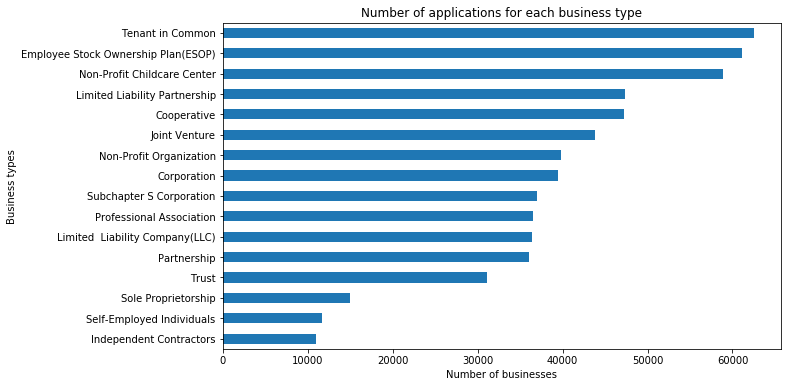

In [15]:
plt.figure(figsize=(10,6))
(df.groupby('BusinessType')['LoanAmount'].mean()).sort_values().plot(kind='barh')
plt.xlabel('Number of businesses')
plt.ylabel('Business types')
plt.title('Number of applications for each business type')
plt.show()

# Question: How often do people include their races/gender/veteran statuses in their applications? 

First, let us answer this question for races.

In [16]:
df['RaceEthnicity'].value_counts(True)

Unanswered                          0.891036
White                               0.089817
Asian                               0.010696
Hispanic                            0.004910
Black or African American           0.003170
American Indian or Alaska Native    0.000372
Name: RaceEthnicity, dtype: float64

Only 11% of the owners indicate their races in their applications to PPP. 

Next, let us look at genders.

In [17]:
df['Gender'].value_counts(True)

Unanswered      0.773407
Male Owned      0.172291
Female Owned    0.054302
Name: Gender, dtype: float64

About 23% of applicants mentioned their genders. Finally, let us take a look at the Veteran variable.

In [18]:
df['Veteran'].value_counts(True)

Unanswered     0.846044
Non-Veteran    0.148840
Veteran        0.005116
Name: Veteran, dtype: float64

About 16% indicated their veterant statuses. 

# Question: How many jobs are retained by the PPP program? 

First, let us compute the total number of jobs saved by PPP.

In [19]:
df['JobsRetained'].describe()

count    165186.000000
mean          4.854001
std          10.158962
min           0.000000
25%           1.000000
50%           2.000000
75%           6.000000
max         500.000000
Name: JobsRetained, dtype: float64

The PPP program saves more than 80,000 jobs. On average, it saves 5 jobs for each business. 

Let take a closer look at the distribution of the number of jobs retained. To get a meaningful plot, let us only plot the distribution for those businesses whose number of retained jobs is less than 20. 

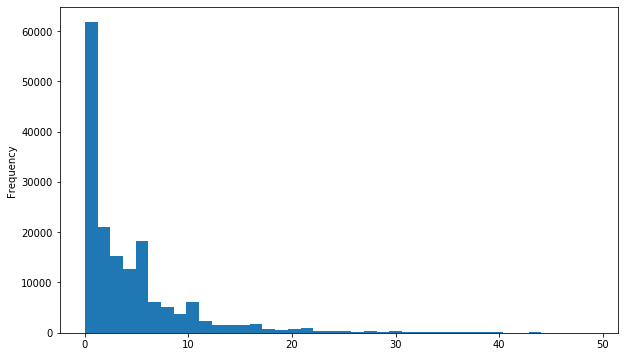

In [20]:
plt.figure(figsize=(10,6))
df[df['JobsRetained']<50]['JobsRetained'].plot(kind='hist', bins=40)
plt.show()

The majority of businesses have less than 10 jobs retained. We can also categorize businesses based on the number of jobs retained. For example, the <a href="https://www.meetup.com/PyDataChi/events/271789356"> E-verify program</a> divide companies into several categories. We will follow their classification in our project.

In [21]:
def business_size(x):
    if x<20:
        return str('0-20 employees')
    elif x<100:
        return str('20-99 employees')
    elif x<500:
        return str('100-499')
    else:
        return str('More than 500 employees')

In [22]:
df['BusinessSize']=df['JobsRetained'].apply(business_size) #create a new column about Business Size

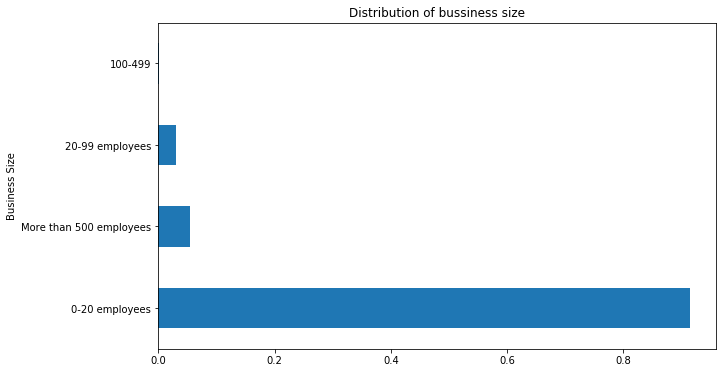

In [23]:
plt.figure(figsize=(10,6))
df['BusinessSize'].value_counts(True).plot(kind='barh')
plt.ylabel('Business Size')
plt.title('Distribution of bussiness size')
plt.show()

This confirms our belief that most businesses that got help from PPP are small businesses. More than 90% of them have less than 20 employees. I am a little surprised that more companies with at least 500 employees participated in PPP than those with a medium size (20-500 employees.)

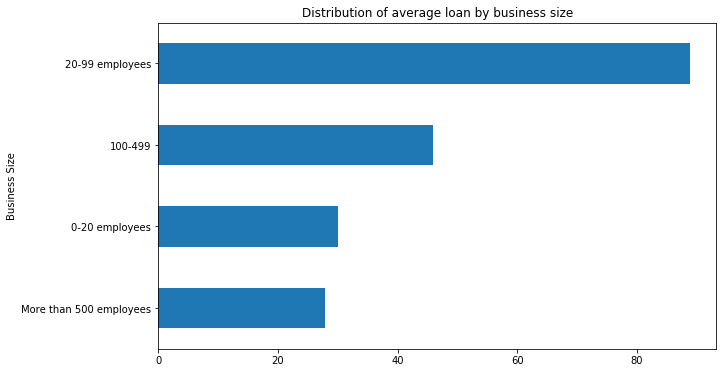

In [24]:
plt.figure(figsize=(10,6))
(df.groupby('BusinessSize')['LoanAmount'].mean()/10**3).sort_values().plot(kind='barh')
plt.ylabel('Business Size')
plt.title('Distribution of average loan by business size')
plt.show()

We see that while there are a lot more applications from businesses with 0-20 employees, this group asked for less loan amount on average. There are rather few applications from businesses with 20-99 employees, they get the most loan amount on average.

# Question: Is there a correlation between the number of jobs retained and the loan amount?

It seems reasonable to expect that if a business has more employees, it might need to loan more. Let's check the relationship between the loan amount and the number of jobs retained.

First, we can compute the correlation between the two variables.

In [25]:
from scipy.stats import pearsonr
x=df[df['JobsRetained'].notnull()]['LoanAmount']
y=df[df['JobsRetained'].notnull()]['JobsRetained']
pearsonr(x,y)[0]

0.37317013833679197

There is a small correlation betwee these two variables. Let's take a look at the scatter plot for these two variables.

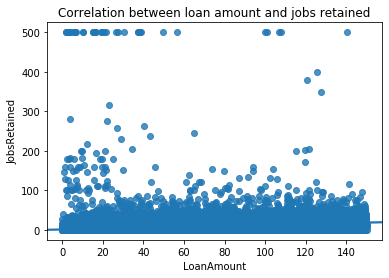

In [26]:
sns.regplot(x=df['LoanAmount']/10**3,y=df['JobsRetained'])
plt.title('Correlation between loan amount and jobs retained')
plt.show()

There are several outliers when the number of jobs retained are above 100. Let us restrict ourselves to businesses with less than 100 jobs retained.

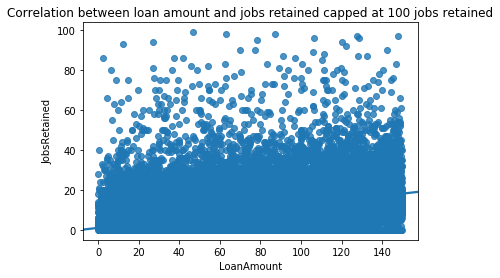

The correlation between jobs retained and Loan Amount is 0.605075785451169


In [27]:
x=df[df['JobsRetained']<100]['LoanAmount']/10**3
y=df[df['JobsRetained']<100]['JobsRetained']
sns.regplot(x,y)
plt.title('Correlation between loan amount and jobs retained capped at 100 jobs retained')
plt.show()
print(f"The correlation between jobs retained and Loan Amount is {pearsonr(x,y)[0]}")

Clearly, with this restriction, the two variables show a stronger linear relationship. 

# Question: How the number of approval changes over time?

Let us make a line graph about the number of approval over time.

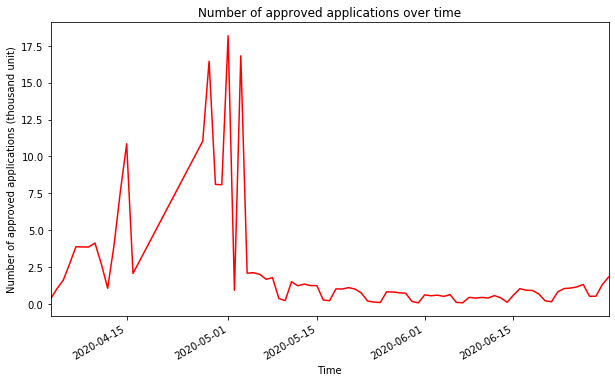

In [42]:
plt.figure(figsize=(10,6))
(df['DateApproved'].value_counts()/10**3).sort_index().plot(kind='line',color='red')
plt.xlabel('Time')
plt.ylabel('Number of approved applications (thousand unit)')
plt.title('Number of approved applications over time')
plt.show()

There are some peaks in mid April and at the end of April. After mid May, the number of approvals is stable.

Let us also compare the changes between different business types. 

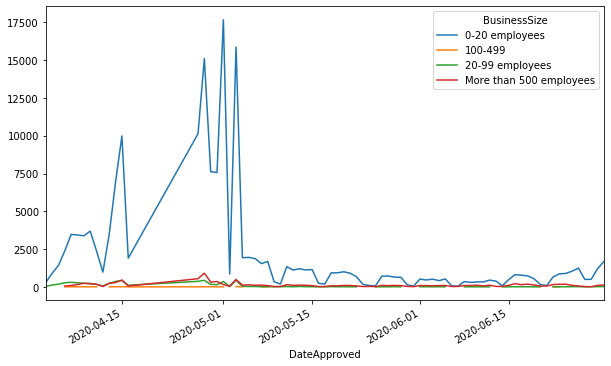

In [53]:
df.groupby('DateApproved')['BusinessSize'].value_counts().unstack().plot(kind='line', figsize=(10,6))
plt.show()

We conclude that there are very few applications from businesses with more than 20 jobs retained. Consequently, the line graph for businesses with 0-20 employees look rather similar to the line graph for all businesses. 

# Question: What are the most common lenders?

Let us take a look at the lenders. First, let us see how many lenders participated in PPP. 

In [63]:
df['Lender'].nunique()

1188

There are more than 1100 of them. We can dive in to see how many applications they approved.

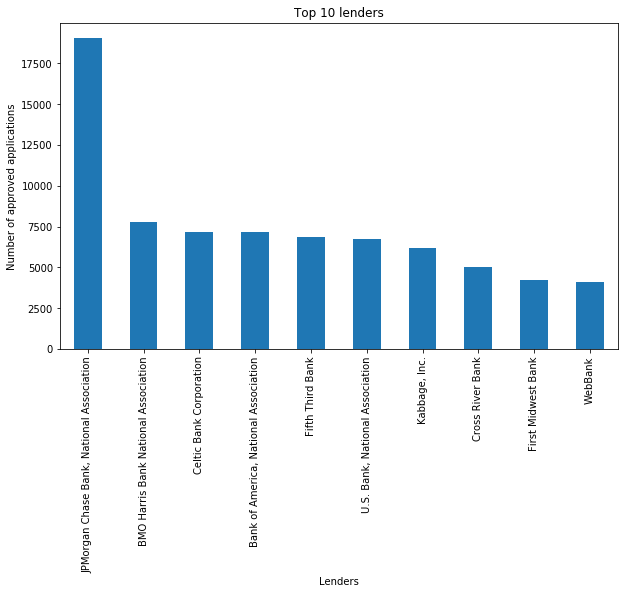

In [70]:
df['Lender'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,6))
plt.xlabel('Lenders')
plt.ylabel('Number of approved applications')
plt.title('Top 10 lenders')
plt.show()

It is not surprise that Chase and BMO are the most popular lenders. We can also investigate which lenders lend the most amount of money to businesses.

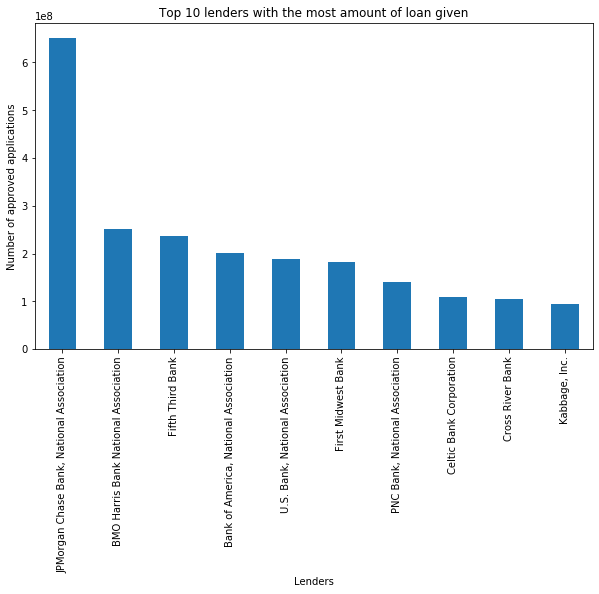

In [72]:
df.groupby('Lender')['LoanAmount'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,6))
plt.xlabel('Lenders')
plt.ylabel('Number of approved applications')
plt.title('Top 10 lenders with the most amount of loan given')
plt.show()

While Chase and BMO are still the top 2 lenders in terms of the total amount, the third place is Fifty-Third Bank. In other words, while Fifty-Third Bank gives loans to fewer applications, they lend a bigger amount of money than Celtic Bank. Why this is the case? 

Let us also take a look at the number of applications for some top lenders over time. 

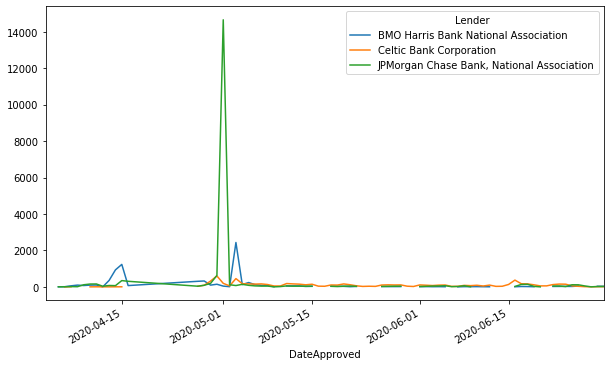

In [89]:
top_3_bank=['JPMorgan Chase Bank, National Association',
            'BMO Harris Bank National Association', 
            'Celtic Bank Corporation']
top3_bank= df[df['Lender'].isin(top_3_bank)]
top3_bank.groupby('DateApproved')['Lender'].value_counts().unstack().plot(kind='line', figsize=(10,6))
plt.show()

We see the same pattern: there is a peak around May 1st. However, as the number of applications from Chase dominates the other two lenders, let us focus the other two. 

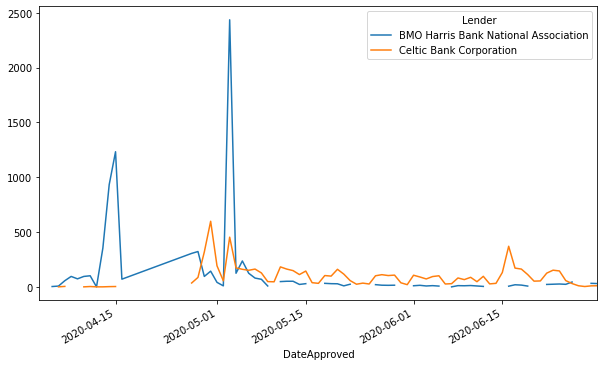

In [90]:
top_2_bank=[
            'BMO Harris Bank National Association', 
            'Celtic Bank Corporation']
top2_bank= df[df['Lender'].isin(top_2_bank)]
top2_bank.groupby('DateApproved')['Lender'].value_counts().unstack().plot(kind='line', figsize=(10,6))
plt.show()

We see that the applications to BMO accumulated in the first two months of PPP. After, the number is stable around 0. Celtic Bank, on the other hand, starts slowly but keeps a steady number after Mid April. 

# Question: What is the distribution of PPP for each district? 

Let us investigate which districts get the most loan amount from PPP. 

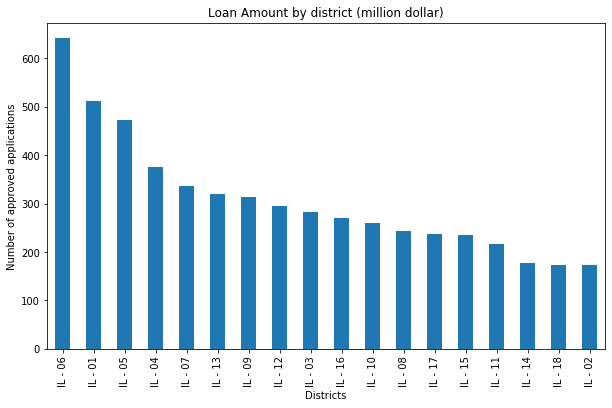

In [106]:
(df.groupby('CD')['LoanAmount'].sum()/10**6).sort_values(ascending=False).head(18).plot(kind='bar', figsize=(10,6))
plt.xlabel('Districts')
plt.ylabel('Number of approved applications')
plt.title('Loan Amount by district (million dollar)')
plt.show()

Overall, we can say that the PPP distributes pretty fairly for different districts. 

# Conclusions. 

Here are 10 things that we learn from this investigation. 

1. So far, about 174,745 businesses got help from the PPP program. On average, the PPP program saved about 5 jobs per business. In total, there are about 165186 jobs saved by PPP. 


2. The total loan amount so far is about 5.5 billion dollars. The majority of businesses asked for less than 60,000$. 


3. Businesses from Chicago, Naperville, Springfield got the most total loan amount. However, on average, Cadwell, Countryside, and Hines have a bigger loan amount. 

4. Corporation, Subchapter S Corporation, Sole Proprietorship are the top three business types that got help from PPP. However, on average, Tenant in Common, Employee Stock Ownership Plan(ESOP), Non-Profit Childcare Center need bigger loans. 


5. 11% of the owners indicate their races, 23% of applicants mentioned their genders, and About 16% indicated their veteran statuses. 


6. More than 90% of businesses that got help from PPP have less than 20 employees. This confirms the agenda of PPP is to help small businesses. 


7. It is rather counter-intuitive that there a rather small correlation between the number of jobs retained and the loan amount. However, if we remove outliers (businesses with more than 100 employees), these two variables show a much stronger relationship. 


8. There are peaks in approved applications in mid-April and at the end of April. After mid-May, the number of approvals is stable.


9. The top 3 lenders are JPMorgan Chase, BMO, Celtic Bank. 


10. The PPP is distributed rather fairly across 18 congressional districts. 









